Importing necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
train = pd.read_csv(r"C:\Users\MyAccount\Documents\Downloads\project\train.csv")
test = pd.read_csv(r"C:\Users\MyAccount\Documents\Downloads\project\test.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train.shape

(1460, 81)

In [6]:
test.shape

(1459, 80)

In [1]:
##Combining training and testing datasets

In [7]:
final = pd.concat([train, test], axis = 0)

In [8]:
final.shape

(2919, 81)

In [9]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [10]:
final.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

In [2]:
##dropping less correlated with target column and unnecessary columns

In [11]:
final = final.drop(['PoolQC', 'Fence', 'MiscFeature', 'Alley', 'PoolArea', 'MoSold', '3SsnPorch',
                    'BsmtFinSF2', 'BsmtHalfBath', 'MiscVal', 'Id', 'LowQualFinSF', 'YrSold', 
                    'OverallCond', 'MSSubClass'], axis = 1)

In [12]:
final.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       'ScreenPorch', 'SaleType', 'SaleCondition

In [13]:
final.shape

(2919, 66)

In [4]:
##Filling Null Values

In [15]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 66 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       2915 non-null   object 
 1   LotFrontage    2433 non-null   float64
 2   LotArea        2919 non-null   int64  
 3   Street         2919 non-null   object 
 4   LotShape       2919 non-null   object 
 5   LandContour    2919 non-null   object 
 6   Utilities      2917 non-null   object 
 7   LotConfig      2919 non-null   object 
 8   LandSlope      2919 non-null   object 
 9   Neighborhood   2919 non-null   object 
 10  Condition1     2919 non-null   object 
 11  Condition2     2919 non-null   object 
 12  BldgType       2919 non-null   object 
 13  HouseStyle     2919 non-null   object 
 14  OverallQual    2919 non-null   int64  
 15  YearBuilt      2919 non-null   int64  
 16  YearRemodAdd   2919 non-null   int64  
 17  RoofStyle      2919 non-null   object 
 18  RoofMatl

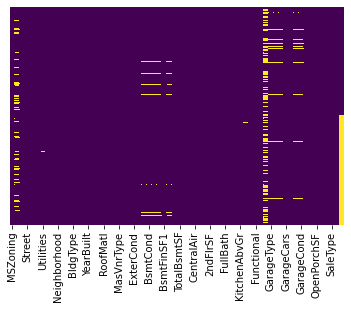

In [16]:
sns.heatmap(final.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [17]:
corr_matrix = final.corr()
corr_matrix['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

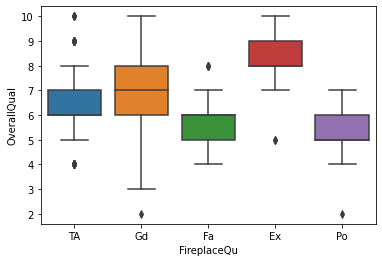

In [19]:
x = 'FireplaceQu'
y = 'SalePrice'
z = 'OverallQual'
sns.boxplot(x, z, data = final)

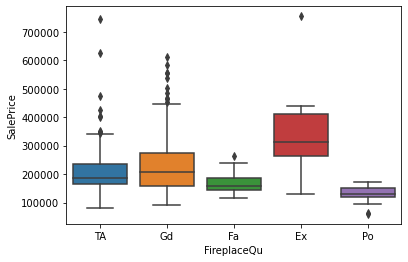

In [20]:
sns.boxplot(x, y, data = final)

In [21]:
TA_med = final[final['FireplaceQu'] == 'TA']['OverallQual'].median()
Gd_med = final[final['FireplaceQu'] == 'Gd']['OverallQual'].median()
Fa_med = final[final['FireplaceQu'] == 'Fa']['OverallQual'].median()
Ex_med = final[final['FireplaceQu'] == 'Ex']['OverallQual'].median()
Po_med = final[final['FireplaceQu'] == 'Po']['OverallQual'].median()
print("TA_med", TA_med)
print("Gd_med", Gd_med)
print("Fa_med", Fa_med)
print("Ex_med", Ex_med)
print("Po_med", Po_med)

TA_med 6.0
Gd_med 7.0
Fa_med 6.0
Ex_med 8.0
Po_med 5.0


In [22]:
final['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [23]:
final['FireplaceQu'].value_counts()

Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64

In [24]:
def impute_fpq(cols):
    FireplaceQu = cols[0]
    OverallQual = cols[1]
    if pd.isnull(FireplaceQu):
        if OverallQual == 5:
            return 'Po'
        elif OverallQual == 6:
            return 'TA'
        elif OverallQual == 7:
            return 'Gd'
        elif OverallQual == 8:
            return 'Ex'
        
        else:
            return 'Gd'
        
    else:
        return FireplaceQu

In [25]:
final['FireplaceQu'] = final[['FireplaceQu', 'OverallQual']].apply(impute_fpq, axis = 1)

In [26]:
final['FireplaceQu'].isna().sum()

0

In [27]:
final['FireplaceQu'].value_counts()

Gd    1219
TA     904
Po     619
Ex     103
Fa      74
Name: FireplaceQu, dtype: int64

In [28]:
final['FireplaceQu'].unique()

array(['Gd', 'TA', 'Po', 'Fa', 'Ex'], dtype=object)

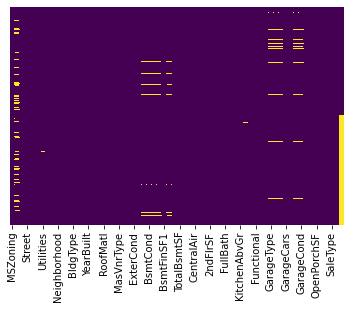

In [29]:
sns.heatmap(final.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [30]:
final.isna().sum()

MSZoning            4
LotFrontage       486
LotArea             0
Street              0
LotShape            0
                 ... 
EnclosedPorch       0
ScreenPorch         0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 66, dtype: int64

In [31]:
final['LotFrontage'].dtype

dtype('float64')

In [32]:
corr_matrix['LotFrontage'].sort_values(ascending=False)

LotFrontage      1.000000
LotArea          0.489896
1stFlrSF         0.458247
GrLivArea        0.382462
GarageArea       0.359786
TotalBsmtSF      0.354822
SalePrice        0.351799
TotRmsAbvGrd     0.349513
GarageCars       0.310587
Fireplaces       0.261970
BedroomAbvGr     0.234892
MasVnrArea       0.221079
BsmtFinSF1       0.219408
OverallQual      0.217645
FullBath         0.181668
OpenPorchSF      0.164896
YearBuilt        0.122811
WoodDeckSF       0.122070
BsmtUnfSF        0.113714
BsmtFullBath     0.113245
YearRemodAdd     0.091557
GarageYrBlt      0.076673
ScreenPorch      0.075858
HalfBath         0.039452
2ndFlrSF         0.026545
EnclosedPorch    0.011509
KitchenAbvGr     0.004676
Name: LotFrontage, dtype: float64

In [33]:
##lotfrontage

In [34]:
mean1 = final['LotFrontage'].mean()

In [35]:
final['LotFrontage'] = final['LotFrontage'].fillna(mean1)

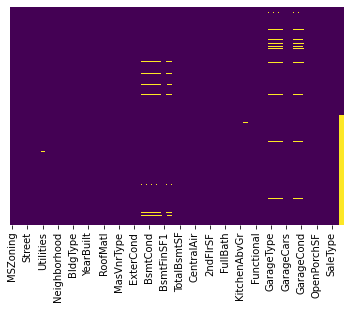

In [36]:
sns.heatmap(final.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [37]:
columns = final.columns
columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       'ScreenPorch', 'SaleType', 'SaleCondition

In [38]:
for i in columns:
    if final[i].isna().sum() > 100:
        print(i)

GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond
SalePrice


In [39]:
##GarageType

In [40]:
final['GarageType'].isna().sum()

157

In [41]:
final['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [42]:
final['GarageType'].value_counts()

Attchd     1723
Detchd      779
BuiltIn     186
Basment      36
2Types       23
CarPort      15
Name: GarageType, dtype: int64

In [43]:
final['GarageType'] = final['GarageType'].fillna('Attchd')

In [44]:
final['GarageType'].isna().sum()

0

In [45]:
##garageyrblt

In [46]:
final['GarageYrBlt'].isna().sum()

159

In [47]:
final['GarageYrBlt'].mean()

1978.1134057971014

In [48]:
corr_matrix['GarageYrBlt'].sort_values(ascending=False)

GarageYrBlt      1.000000
YearBuilt        0.834812
YearRemodAdd     0.652365
GarageCars       0.587712
OverallQual      0.571803
GarageArea       0.555836
FullBath         0.495688
SalePrice        0.486362
TotalBsmtSF      0.348408
GrLivArea        0.273411
1stFlrSF         0.260450
MasVnrArea       0.255112
OpenPorchSF      0.231639
HalfBath         0.225157
WoodDeckSF       0.222584
BsmtFinSF1       0.194270
BsmtUnfSF        0.171588
TotRmsAbvGrd     0.162684
BsmtFullBath     0.150492
Fireplaces       0.089651
2ndFlrSF         0.086094
LotFrontage      0.076673
LotArea         -0.008628
BedroomAbvGr    -0.045364
ScreenPorch     -0.062320
KitchenAbvGr    -0.092989
EnclosedPorch   -0.300751
Name: GarageYrBlt, dtype: float64

In [50]:
final['GarageYrBlt'] = final['GarageYrBlt'].fillna(final['GarageYrBlt'].mean())

In [51]:
final['GarageYrBlt'].isna().sum()

0

In [52]:
##GarageFinish

In [53]:
final['GarageFinish'].isna().sum()

159

In [54]:
final['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [55]:
final['GarageFinish'].value_counts()

Unf    1230
RFn     811
Fin     719
Name: GarageFinish, dtype: int64

In [56]:
final['GarageFinish'] = final['GarageFinish'].fillna('Unf')

In [57]:
final['GarageFinish'].isna().sum()

0

In [58]:
##GarageQual

In [59]:
final['GarageQual'].isna().sum()

159

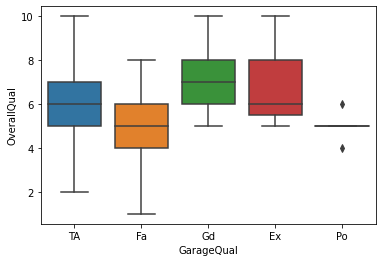

In [60]:
sns.boxplot('GarageQual', 'OverallQual', data = final)

In [61]:
final['GarageQual'].value_counts()

TA    2604
Fa     124
Gd      24
Po       5
Ex       3
Name: GarageQual, dtype: int64

In [62]:
TA_med = final[final['GarageQual'] == 'TA']['OverallQual'].median()
Gd_med = final[final['GarageQual'] == 'Gd']['OverallQual'].median()
Fa_med = final[final['GarageQual'] == 'Fa']['OverallQual'].median()
Ex_med = final[final['GarageQual'] == 'Ex']['OverallQual'].median()
Po_med = final[final['GarageQual'] == 'Po']['OverallQual'].median()
print("TA_med", TA_med)
print("Gd_med", Gd_med)
print("Fa_med", Fa_med)
print("Ex_med", Ex_med)
print("Po_med", Po_med)

TA_med 6.0
Gd_med 7.0
Fa_med 5.0
Ex_med 6.0
Po_med 5.0


In [63]:
def impute_gqual(cols):
    GarageQual = cols[0]
    OverallQual = cols[1]
    if pd.isnull(GarageQual):
        if OverallQual == 5:
            return 'Po'
        elif OverallQual == 6:
            return 'TA'
        elif OverallQual == 7:
            return 'Gd'
        
        else:
            return 'nan'
        
    else:
        return GarageQual

In [64]:
final['GarageQual'] = final[['GarageQual', 'OverallQual']].apply(impute_gqual, axis = 1)

In [65]:
final['GarageQual'].isna().sum()

0

In [66]:
##GarageCOnd

In [67]:
final['GarageCond'].isna().sum()

159

In [68]:
final['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [69]:
final['GarageCond'].value_counts()

TA    2654
Fa      74
Gd      15
Po      14
Ex       3
Name: GarageCond, dtype: int64

In [70]:
final['GarageCond'] = final['GarageCond'].fillna('TA')

In [71]:
final['GarageCond'].isna().sum()

0

In [73]:
for i in columns:
    if final[i].isna().sum() >= 1:
        print(i, final[i].dtypes)

MSZoning object
Utilities object
Exterior1st object
Exterior2nd object
MasVnrType object
MasVnrArea float64
BsmtQual object
BsmtCond object
BsmtExposure object
BsmtFinType1 object
BsmtFinSF1 float64
BsmtFinType2 object
BsmtUnfSF float64
TotalBsmtSF float64
Electrical object
BsmtFullBath float64
KitchenQual object
Functional object
GarageCars float64
GarageArea float64
SaleType object
SalePrice float64


In [74]:
col1 = ['MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageCars', 'BsmtFullBath', 'GarageArea']

In [75]:
col = ['MSZoning', 'Utilities', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'KitchenQual', 'Functional', 'Exterior1st',
       'Exterior2nd', 'SaleType']

In [76]:
for i in col:
    final[i] = final[i].fillna(final[i].mode()[0])

In [77]:
for j in col1:
    final[j] = final[j].fillna(final[j].mean()
                              
                              )

In [78]:
for i in columns:
    if final[i].isna().sum() >= 1:
        print(i)

SalePrice


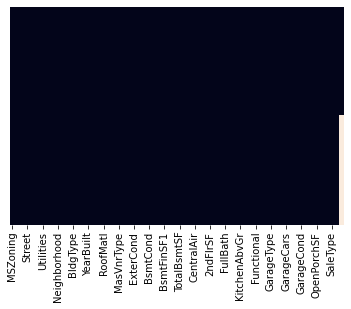

In [79]:
sns.heatmap(final.isnull(), yticklabels=False, cbar=False)

In [80]:
final.shape

(2919, 66)

Replacing string values with integer

In [81]:
##MSZoning

In [82]:
final['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [83]:
final.groupby(['MSZoning'])['SalePrice'].median().sort_values(ascending = False)

MSZoning
FV         205950.0
RL         174000.0
RH         136500.0
RM         120500.0
C (all)     74700.0
Name: SalePrice, dtype: float64

In [84]:
final['MSZoning'] = final['MSZoning'].replace({
    'FV':5,
    'RL':4,
    'RH':3,
    'RM':2,
    'C (all)':1
}) 

In [85]:
final['MSZoning'].unique()

array([4, 2, 1, 5, 3], dtype=int64)

In [86]:
final['MSZoning'].dtype

dtype('int64')

In [87]:
##ExterQual

In [88]:
final['ExterQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [89]:
final['ExterQual'] = final['ExterQual'].replace({
    'Ex':4,
    'Gd':3,
    'TA':2,
    'Fa':1
}) 

In [90]:
final['ExterQual'].unique()

array([3, 2, 4, 1], dtype=int64)

In [91]:
##ExterCond

In [92]:
final['ExterCond'].unique()

array(['TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object)

In [93]:
final['ExterCond'] = final['ExterCond'].replace({
    'Ex':5,
    'Gd':4,
    'TA':3,
    'Fa':2,
    'Po':1
}) 

In [94]:
final['ExterCond'].unique()

array([3, 4, 2, 1, 5], dtype=int64)

In [95]:
##BsmtQual

In [96]:
final['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [97]:
final['BsmtQual'] = final['BsmtQual'].replace({
    'Ex':4,
    'Gd':3,
    'TA':2,
    'Fa':1
})

In [98]:
final['BsmtQual'].unique()

array([3, 2, 4, 1], dtype=int64)

In [99]:
##BsmtCond

In [100]:
final['BsmtCond'].unique()

array(['TA', 'Gd', 'Fa', 'Po'], dtype=object)

In [101]:
final['BsmtCond'] = final['BsmtCond'].replace({
    'Gd':4,
    'TA':3,
    'Fa':2,
    'Po':1
})

In [102]:
final['BsmtCond'].unique()

array([3, 4, 2, 1], dtype=int64)

In [103]:
##BsmtExposure

In [104]:
final.groupby(['BsmtExposure'])['SalePrice'].median().sort_values(ascending = False)

BsmtExposure
Gd    226975.0
Av    185850.0
Mn    182450.0
No    151000.0
Name: SalePrice, dtype: float64

In [105]:
final['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av'], dtype=object)

In [106]:
final['BsmtExposure'] = final['BsmtExposure'].replace({
    'Gd':4,
    'Av':3,
    'Mn':2,
    'No':1
})

In [107]:
final['BsmtExposure'].unique()

array([1, 4, 2, 3], dtype=int64)

In [108]:
##HeatingQc

In [109]:
final.groupby(['HeatingQC'])['SalePrice'].median().sort_values(ascending = False)

HeatingQC
Ex    194700.0
Gd    152000.0
TA    135000.0
Fa    123500.0
Po     87000.0
Name: SalePrice, dtype: float64

In [110]:
final['HeatingQC'].unique()

array(['Ex', 'Gd', 'TA', 'Fa', 'Po'], dtype=object)

In [111]:
final['HeatingQC'] = final['HeatingQC'].replace({
    'Ex':5,
    'Gd':4,
    'TA':3,
    'Fa':2,
    'Po':1
}) 

In [112]:
final['HeatingQC'].unique()

array([5, 4, 3, 2, 1], dtype=int64)

In [113]:
##KitchenQual

In [114]:
final['KitchenQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [115]:
final['KitchenQual'] = final['KitchenQual'].replace({
    'Ex':4,
    'Gd':3,
    'TA':2,
    'Fa':1
})

In [116]:
final['KitchenQual'].unique()

array([3, 2, 4, 1], dtype=int64)

In [117]:
##FireplaceQu

In [118]:
final['FireplaceQu'].unique()

array(['Gd', 'TA', 'Po', 'Fa', 'Ex'], dtype=object)

In [119]:
final['FireplaceQu'] = final['FireplaceQu'].replace({
    'Ex':5,
    'Gd':4,
    'TA':3,
    'Fa':2,
    'Po':1
})

In [120]:
final['FireplaceQu'].unique()

array([4, 3, 1, 2, 5], dtype=int64)

In [121]:
##GarageQual

In [122]:
final['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', 'nan', 'Po', 'Ex'], dtype=object)

In [123]:
final['GarageQual'].value_counts()

TA     2626
Fa      124
Po       71
nan      67
Gd       28
Ex        3
Name: GarageQual, dtype: int64

In [124]:
final['GarageQual'] = final['GarageQual'].replace({
    'Ex':5,
    'Gd':4,
    'TA':3,
    'Fa':2,
    'Po':1,
    'nan':3
})

In [125]:
final['GarageQual'].unique()

array([3, 2, 4, 1, 5], dtype=int64)

In [126]:
##GarageCond

In [127]:
final['GarageCond'].unique()

array(['TA', 'Fa', 'Gd', 'Po', 'Ex'], dtype=object)

In [128]:
final['GarageCond'] = final['GarageCond'].replace({
    'Ex':5,
    'Gd':4,
    'TA':3,
    'Fa':2,
    'Po':1
})

In [129]:
final['GarageCond'].unique()

array([3, 2, 4, 1, 5], dtype=int64)

In [130]:
##centralAir

In [131]:
final.groupby(['CentralAir'])['SalePrice'].median().sort_values(ascending = False)

CentralAir
Y    168000.0
N     98000.0
Name: SalePrice, dtype: float64

In [132]:
final['CentralAir'] = final['CentralAir'].replace({
    'Y':2,
    'N':1
})

In [133]:
final.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       'ScreenPorch', 'SaleType', 'SaleCondition

In [134]:
columns = ['Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
           'Neighborhood', 'Condition1', 'Condition2','BldgType', 'HouseStyle', 'RoofStyle',
           'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtFinType1',
           'BsmtFinType2','Heating', 'Electrical', 'Functional', 'GarageType', 'GarageFinish',
           'PavedDrive', 'SaleType', 'SaleCondition']

In [135]:
len(columns)

27

In [136]:
df = pd.get_dummies(final[columns], drop_first = True)
df.shape

(2919, 160)

In [137]:
df.columns

Index(['Street_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',
       'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl',
       'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=160)

In [138]:
final_df = pd.concat([final, df], axis = 1)

In [139]:
final_df.shape

(2919, 226)

In [140]:
final_df = final_df.drop(['Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
           'Neighborhood', 'Condition1', 'Condition2','BldgType', 'HouseStyle', 'RoofStyle',
           'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtFinType1',
           'BsmtFinType2','Heating', 'Electrical', 'Functional', 'GarageType', 'GarageFinish',
           'PavedDrive', 'SaleType', 'SaleCondition'], axis = 1)

In [141]:
final_df.shape

(2919, 199)

In [142]:
final_df.head()

,MSZoning,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4,65.0,8450,7,2003,2003,196.0,3,3,3,...,0,0,0,0,1,0,0,0,1,0
1,4,80.0,9600,6,1976,1976,0.0,2,3,3,...,0,0,0,0,1,0,0,0,1,0
2,4,68.0,11250,7,2001,2002,162.0,3,3,3,...,0,0,0,0,1,0,0,0,1,0
3,4,60.0,9550,7,1915,1970,0.0,2,3,2,...,0,0,0,0,1,0,0,0,0,0
4,4,84.0,14260,8,2000,2000,350.0,3,3,3,...,0,0,0,0,1,0,0,0,1,0


In [143]:
final_df.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=199)

In [167]:
train_df = final_df.iloc[:1460, :]
test_df = final_df.iloc[1460:, :]

In [168]:
test_df = test_df.drop(['SalePrice'], axis = 1)

In [169]:
train_df.shape

(1460, 199)

In [170]:
test_df.shape

(1459, 198)

In [171]:
X_train = train_df.drop(['SalePrice'], axis = 1)
y_train = train_df['SalePrice']

In [172]:
import xgboost
classifier = xgboost.XGBRegressor()
classifier.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [173]:
xgb_imp = pd.DataFrame({'columns':X_train.columns.values, 'values':classifier.feature_importances_}).sort_values(by = 'values', ascending = False)
xgb_useless = xgb_imp[xgb_imp.values == 0]['columns']
xgb_useless

53       Neighborhood_BrDale
167         Electrical_FuseP
38               Street_Pave
168           Electrical_Mix
194     SaleCondition_Alloca
45          Utilities_NoSeWa
188           SaleType_ConLI
171          Functional_Min1
185             SaleType_CWD
183             PavedDrive_P
174           Functional_Sev
61      Neighborhood_MeadowV
51             LandSlope_Sev
52      Neighborhood_Blueste
177       GarageType_Basment
106           RoofStyle_Shed
86           Condition2_PosA
164             Heating_OthW
90           Condition2_RRNn
109           RoofMatl_Metal
110            RoofMatl_Roll
112         RoofMatl_WdShake
105        RoofStyle_Mansard
98         HouseStyle_2.5Unf
117       Exterior1st_CBlock
97         HouseStyle_2.5Fin
120      Exterior1st_ImStucc
123        Exterior1st_Stone
128      Exterior2nd_AsphShn
129      Exterior2nd_Brk Cmn
131       Exterior2nd_CBlock
136        Exterior2nd_Other
138        Exterior2nd_Stone
161             Heating_GasA
139       Exte

In [174]:
X_train = X_train.drop(xgb_useless, axis = 1)
test_df = test_df.drop(xgb_useless, axis = 1)

In [191]:
better_train_data = pd.concat([X_train, y_train], axis = 1)
better_test_data = test_df

In [193]:
better_test_data.shape

(1459, 150)

In [211]:
better_train_data.to_csv("new_train_data.csv", index = None)
better_test_data.to_csv("new_test_data.csv", index = None)

In [216]:
new_train = pd.read_csv(r"C:\Users\MyAccount\Documents\Downloads\project\new_train_data.csv")
new_test = pd.read_csv(r"C:\Users\MyAccount\Documents\Downloads\project\new_test_data.csv")

In [219]:
new_train.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       ...
       'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand',
       'SaleCondition_Family', 'SaleCondition_Normal', 'SalePrice'],
      dtype='object', length=151)

In [220]:
x_train = new_train.drop(['SalePrice'], axis = 1)
y_train = new_train['SalePrice']

In [181]:
classifier.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [250]:
classifier.fit(x_scaled, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [251]:
pred = classifier.predict(x_scaled)

In [265]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier()
rnd_clf.fit(x_train, y_train)
rnd_pred = rnd_clf.predict(x_train)

In [252]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error
error = mse(y_train, pred)
error_rmse = np.sqrt(error)
print(error_rmse)

2234.6345743920915


In [266]:
rnd_error = mse(y_train, rnd_pred)
rnd_error_rmse = np.sqrt(rnd_error)
print(rnd_error_rmse)

196.28397097133015


In [184]:
##Hyperparameter Tuning

In [185]:
estimators = [100, 500, 900, 110, 1500]
max_depth = [2, 3, 5, 10, 15]
learning_rate = [0.05, 0.1, 0.15, 0.2]
min_child_weight = [1, 2, 3, 4]
param_grid = {
    'n_estimators' : estimators,
    'max_depth' : max_depth,
    'learning_rate' : learning_rate,
    'min_child_weights' : min_child_weight
}

In [186]:
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=classifier, param_distributions = param_grid,
                              cv = 5, n_iter = 50, scoring = 'neg_mean_squared_error',
                              n_jobs = -1, verbose = 5, return_train_score = True,
                              random_state = 42)

In [187]:
random_cv.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 13.9min finished


[12:20:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          callbacks=None, colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=0, gpu_id=-1,
                                          grow_policy='depthwise',
                                          importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_bin=256, m...
                                          n_estimators=100, n_jobs=0,
                                          num_parallel_tree=1, predictor='auto

In [188]:
random_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             min_child_weights=1, missing=nan, monotone_constraints='()',
             n_estimators=900, n_jobs=0, num_parallel_tree=1, predictor='auto',
             random_state=0, reg_alpha=0, ...)

In [189]:
pred1 = random_cv.predict(X_train)

In [190]:
error1 = mse(y_train, pred1)
error_rmse1 = np.sqrt(error1)
print(error_rmse1)

8508.066824276664


In [275]:
estimators = [100, 500, 900, 110, 1500]
max_depth = [2, 3, 5, 10]
min_samples_split = [1, 2, 3, 4]
min_samples_leaf = [1, 2, 3, 4]
param_grid = {
    'n_estimators' : estimators,
    'max_depth' : max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf
}

In [276]:
rnd_random_cv = RandomizedSearchCV(estimator=rnd_clf, param_distributions = param_grid,
                              cv = 5, n_iter = 50, scoring = 'neg_mean_squared_error',
                              n_jobs = -1, verbose = 5, return_train_score = True,
                              random_state = 42)

In [277]:
rnd_random_cv.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 10.8min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 5, 10],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [1, 2, 3, 4],
                                        'n_estimators': [100, 500, 900, 110,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_squared_error', verbose=5)

In [278]:
rnd_pred = rnd_random_cv.predict(X_train)

In [279]:
rnd_error = mse(y_train, rnd_pred)
rnd_error_rmse = np.sqrt(rnd_error)
print(rnd_error_rmse)

4373.113242161369


In [287]:
prediction = rnd_random_cv.predict(new_test)

In [288]:
submission = test[["Id"]]
submission.head()

,Id
0,1461
1,1462
2,1463
3,1464
4,1465


In [289]:
submission["SalePrice"] = prediction

<ipython-input-289-7e5d7ddae02d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission["SalePrice"] = prediction


In [290]:
submission.head()

,Id,SalePrice
0,1461,125000.0
1,1462,141000.0
2,1463,181000.0
3,1464,181000.0
4,1465,180000.0


In [291]:
submission.to_csv("submission_new.csv", index = None)